In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv("../BENCHMARKS/RESULTS/4.3_RESULTS_Inubushi_ni=0.5.csv")

In [18]:
# Group by 'Type' and calculate mean and std for each group
unit_column = np.array([np.ones(35)*100, np.ones(35)*150, np.ones(35)*200, np.ones(35)*250]).flatten()
df.insert(loc=2, column='UNITS', value=unit_column)


In [221]:
std_df = pd.DataFrame(df.groupby(["UNITS", "TYPE"]).std()['MSE']).reset_index().set_index(['UNITS', 'TYPE']).unstack()
mean_df = pd.DataFrame(df.groupby(["UNITS", "TYPE"]).mean()['MSE']).reset_index().set_index(['UNITS', 'TYPE']).unstack()

In [195]:
std_df

MSE                                                          \
TYPE              0             1             2             3             4   
UNITS                                                                         
100.0  1.681007e-06  2.383289e-08  2.299094e-07  2.703541e-08  2.454960e-06   
150.0  2.543848e-06  1.003782e-08  3.042614e-10  4.769090e-08  5.104800e-10   
200.0  1.389516e-06  2.146273e-08  1.506955e-10  2.947190e-07  3.362114e-10   
250.0  8.766432e-07  3.644959e-07  6.637595e-11  3.180166e-07  1.928949e-10   

                                   
TYPE              5             6  
UNITS                              
100.0  2.978648e-07  7.561586e-08  
150.0  3.295983e-10  1.778614e-08  
200.0  2.275211e-10  1.552168e-10  
250.0  1.733985e-10  4.288274e-11

In [188]:
mean_df

MSE                                                          \
TYPE          0             1             2             3             4   
UNITS                                                                     
100.0  0.000005  9.140333e-08  1.047950e-07  1.022523e-07  1.229541e-06   
150.0  0.000005  6.983918e-08  8.519860e-10  1.245732e-07  1.260107e-09   
200.0  0.000004  7.538878e-08  5.027163e-10  2.793699e-07  8.520815e-10   
250.0  0.000002  3.429150e-07  2.706576e-10  1.481267e-07  4.299275e-10   

                                   
TYPE              5             6  
UNITS                              
100.0  1.369210e-07  3.616144e-08  
150.0  1.198879e-09  9.216387e-09  
200.0  3.972886e-10  3.420999e-10  
250.0  3.006265e-10  1.659436e-10

In [212]:
std_df = std_df.mean()

In [214]:
std_df[3]

1.7186547017769517e-07

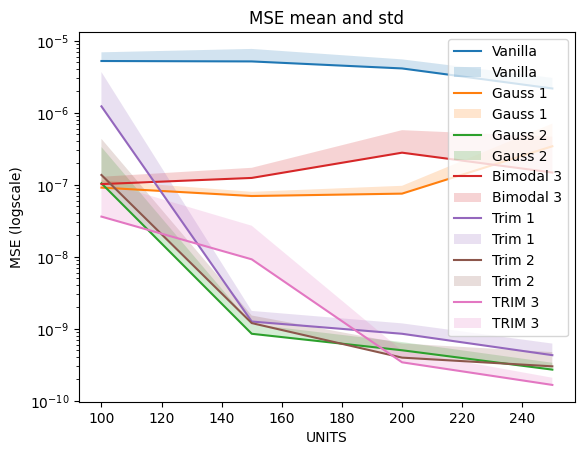

In [224]:
logscale = True


for c in mean_df.columns:
    x = mean_df.index.values
    y_mean = mean_df[c]
    plt.plot(x, y_mean)
    plt.fill_between(x, y_mean, y_mean + std_df[c], alpha=0.2, linewidth=4, linestyle='dashdot', antialiased=True)
    #plt.errorbar(x, y_mean, std_df[i])

    # Set labels and title
    plt.xlabel('UNITS')
    plt.ylabel(f'MSE {"(logscale)" if logscale else ""}')
    plt.title('MSE mean and std')

# Customize legend labels
legend_labels = [
    'Vanilla',
    'Vanilla',
    'Gauss 1',
    'Gauss 1',
    'Gauss 2',
    'Gauss 2',
    'Bimodal 3',
    'Bimodal 3',
    'Trim 1',
    'Trim 1',
    'Trim 2',
    'Trim 2',
    'TRIM 3', 
    'TRIM 3'
]

plt.legend(labels= [legend_labels[i] for i in range(mean_df.columns.shape[0]*2)])
    
plt.yscale("log")
#plt.ylim([10**(-4), 10**(-15)])      
# Show the plot
plt.show()

In [61]:
std_df[c0]

UNITS
100.0    1.681007e-06
150.0    2.543848e-06
200.0    1.389516e-06
250.0    8.766432e-07
Name: (MSE, 0), dtype: float64

In [249]:
def results_timeseries_plotter(attribute = "MSE", filepath = "../BENCHMARKS/RESULTS/4.3_RESULTS_Inubushi_ni=0.5.csv", title = "Inubushi Function (ni = 0.5)", logscale = True, plot_stds = True):
    
    df = pd.read_csv(filepath)
    unit_column = np.array([np.ones(35)*100, np.ones(35)*150, np.ones(35)*200, np.ones(35)*250]).flatten()
    df.insert(loc=2, column='UNITS', value=unit_column)
    mean_df = pd.DataFrame(df.groupby(["UNITS", "TYPE"]).mean()[attribute]).reset_index().set_index(['UNITS', 'TYPE']).unstack()

    # Plot the data
    #ax = df_unstacked.plot(kind='line', marker='o', logy=logscale)

    if plot_stds: 
        std_df = pd.DataFrame(df.groupby(["UNITS", "TYPE"]).std()[attribute]).reset_index().set_index(['UNITS', 'TYPE']).unstack()
        
    for c in mean_df.columns:
        x = mean_df.index.values
        y_mean = mean_df[c]
        plt.plot(x, y_mean)

        if plot_stds: 
            plt.fill_between(x, y_mean, y_mean + std_df[c], alpha=0.2, linewidth=4, linestyle='dashdot', antialiased=True)

    # Set labels and title
    plt.xlabel('UNITS')
    plt.ylabel(f'{attribute} {"(logscale)" if logscale else ""}')
    plt.title(title)

    # Customize legend labels
    legend_labels = [
        'Vanilla',
        'Vanilla',
        'Gauss 1',
        'Gauss 1',
        'Gauss 2',
        'Gauss 2',
        'Bimodal 3',
        'Bimodal 3',
        'Trim 1',
        'Trim 1',
        'Trim 2',
        'Trim 2',
        'TRIM 3', 
        'TRIM 3'
    ]

    plt.legend(labels= [legend_labels[i] for i in range(mean_df.columns.shape[0]*2)])
    #plt.legend(labels= [legend_labels[i] for i in range(mean_df.columns.shape[0]*2)])

    if logscale:
        plt.yscale("log")

    # Show the plot
    plt.show()

In [44]:
attribute = "MSE" 
filepath = "../BENCHMARKS/RESULTS/4.3_RESULTS_Inubushi_ni=0.5.csv"
title = "Inubushi Function (ni = 0.5)"
logscale = True
plot_stds = True

## Inubushi 

## Inubushi $\nu$ = 0.5 $\tau$ = 5 

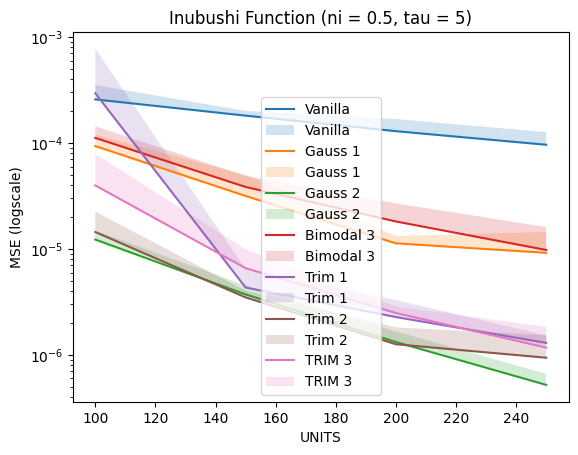

In [243]:
results_timeseries_plotter("MSE","../BENCHMARKS/RESULTS/4.4_RESULTS_Inubushi_ni=0.5_tau=5.csv", "Inubushi Function (ni = 0.5, tau = 5)", plot_stds=True)

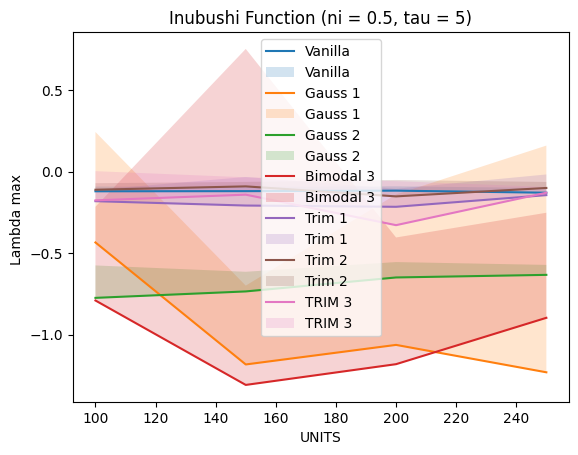

In [250]:
results_timeseries_plotter("Lambda max","../BENCHMARKS/RESULTS/4.4_RESULTS_Inubushi_ni=0.5_tau=5.csv", "Inubushi Function (ni = 0.5, tau = 5)", logscale=False)

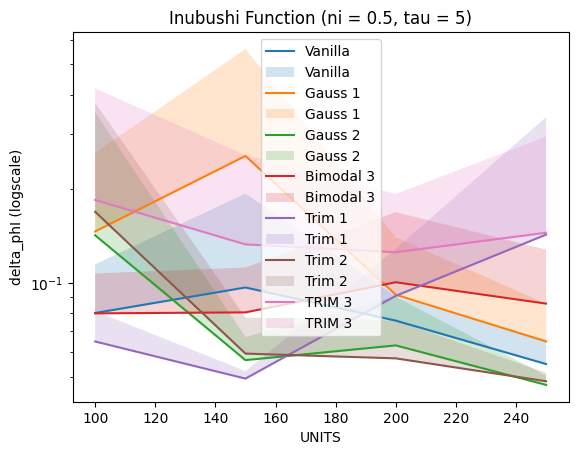

In [251]:
results_timeseries_plotter("delta_phI","../BENCHMARKS/RESULTS/4.4_RESULTS_Inubushi_ni=0.5_tau=5.csv", "Inubushi Function (ni = 0.5, tau = 5)", logscale=True)

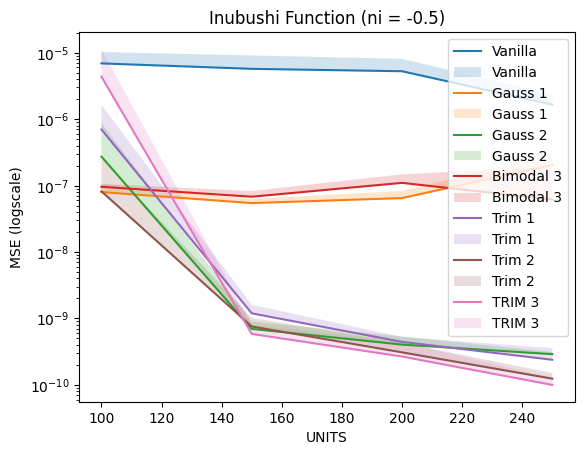

In [252]:
results_timeseries_plotter("MSE","../BENCHMARKS/RESULTS/4.6_RESULTS_Inubushi_ni=-0.5.csv", "Inubushi Function (ni = -0.5)")

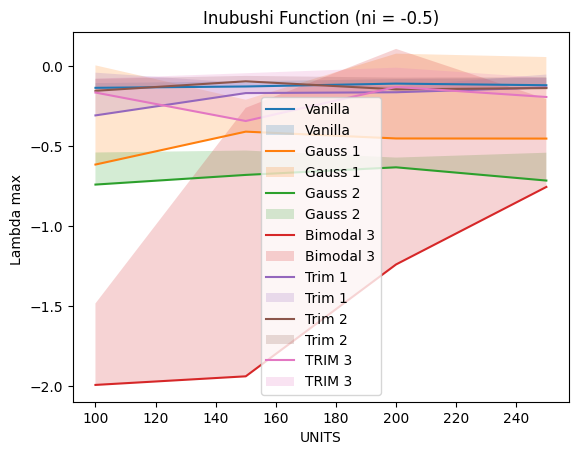

In [253]:
results_timeseries_plotter("Lambda max","../BENCHMARKS/RESULTS/4.6_RESULTS_Inubushi_ni=-0.5.csv", "Inubushi Function (ni = -0.5)", logscale=False)

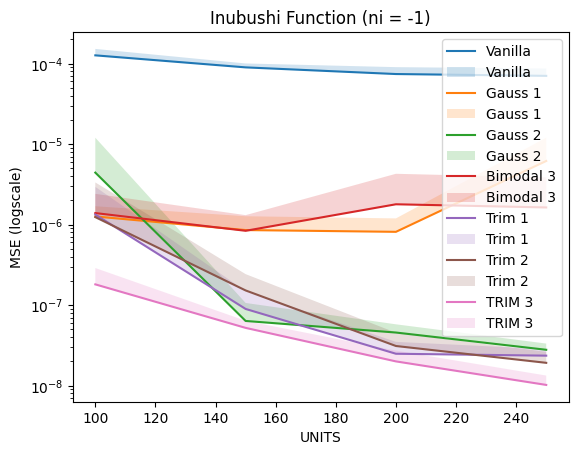

In [254]:
results_timeseries_plotter("MSE","../BENCHMARKS/RESULTS/4.8_Inubushi_ni=-10.csv", "Inubushi Function (ni = -1)")

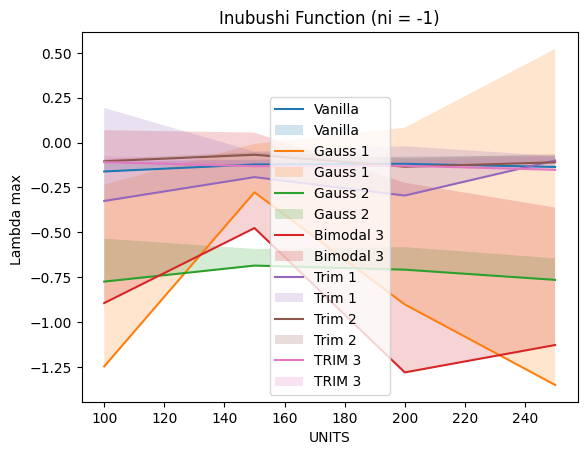

In [255]:
results_timeseries_plotter("Lambda max","../BENCHMARKS/RESULTS/4.8_Inubushi_ni=-10.csv", "Inubushi Function (ni = -1)", logscale=False)

In [14]:
df = pd.read_csv("../BENCHMARKS/RESULTS/3_RESULTS_VerstraetenDambre.csv")

In [15]:
df

,Unnamed: 0,Name,TYPE,MSE,MC,Lambda max,delta_phI,KL,Rho,A-Norm,B-Norm
0,0,1) - Vanilla - 100 UNIT - Spectral Radius: 0.95,0,0.047673,18.497938,-0.103597,0.053663,NaN,0.950000,1.000000,0.000000
1,1,1) - Gauss 1 - 100 UNIT - Spectral Radius: 0.95,1,0.049179,8.462865,-1.785476,0.082104,0.285972,0.948949,17.470072,4.659165
2,2,1) - Gauss 2 - 100 UNIT - Spectral Radius: 0.95,2,0.048813,8.139781,-3.275302,0.621249,0.220244,0.945875,18.300255,7.182390
3,3,1) - Bimodal - 100 UNIT - Spectral Radius: 0.95,3,0.049077,8.181185,-1.925430,0.321009,0.108781,0.949612,19.047150,9.461167
4,4,1) - Trim 1 - 100 UNIT - Spectral Radius: 0.95,4,0.049190,9.478030,-0.119054,0.060177,0.078437,0.944941,18.479555,7.982610
5,5,1) - Trim 2 - 100 UNIT - Spectral Radius: 0.95,5,0.048915,9.695772,-0.077944,0.068226,0.058297,0.945729,18.460842,8.143819
6,6,1) - Vanilla - 150 UNIT - Spectral Radius: 0.95,0,0.049314,19.442188,-0.149194,0.100916,NaN,0.950001,1.000000,0.000000
7,7,1) - Gauss 1 - 150 UNIT - Spectral Radius: 0.95,1,0.049504,10.814193,-1.847376,0.101629,0.248814,0.939240,20.335196,5.024570
8,8,1) - Gauss 2 - 150 UNIT - Spectral Radius: 0.95,2,0.049803,9.197133,-0.677141,0.045289,0.242102,0.949601,22.218372,8.530670
9,9,1) - Bimodal - 150 UNIT - Spectral Radius: 0.95,3,0.050572,8.655501,-0.708231,0.108545,0.099431,0.948363,23.385010,11.580247
